# CREDIT RISK PREDICTION MODEL

## PROBLEM STATEMENT:
**The goal of this project is to predict whether a loan applicant will default (1) or not default (0) using the given dataset.
The dataset includes several features related to each applicant, such as income, interest rate, employment duration, dependents, mortgage status, and other financial details. Using these features, I built a Logistic Regression model to understand which factors contribute most to loan defaults and to classify applicants into defaulters and non-defaulters.
This helps financial institutions make better and more informed loan decisions.**

## KAGGLE DATASET:
**https://www.kaggle.com/datasets/nikhil1e9/loan-default**


## LIBRARIES NEEDED:
- **Pandas**       -  For Data loading, cleaning, and manipulation
- **Matplotlib**   -  For Data visulaization and plotting
- **Scikit-Learn** -  For machine learning model building and evaluation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## LOADING DATA

In [7]:
loading_data = pd.read_csv("Loan_Default.csv")
data = pd.DataFrame(loading_data)

## CLEANING DATA AND HANDLING MISSING VALUES

In [3]:
data.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [4]:
data.info()
data.isnull().sum()  # There is no null value in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## VISUALIZING DATA

In [8]:
defaulters = data["Default"].sum()  # There are 29,653 people who went default
print("Total number of people who went default: ", defaulters )

Total number of people who went default:  29653


**Ratio Of Defaulters & Non-Defaulters**

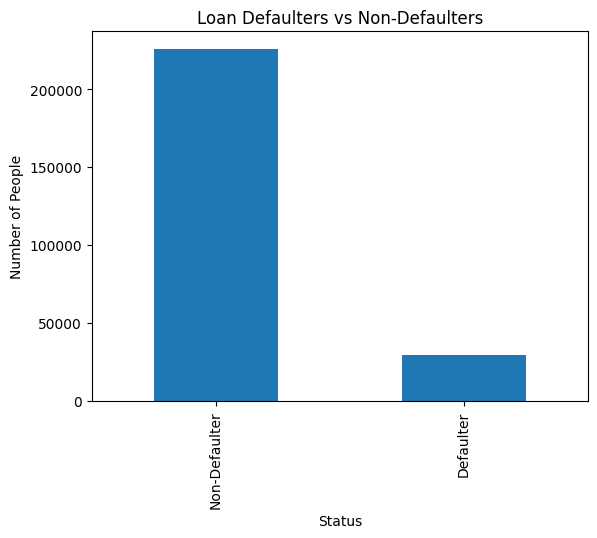

In [9]:
count = data['Default'].replace({1: 'Defaulter', 0: 'Non-Defaulter'}).value_counts()

plt.figure()
count.plot(kind='bar')
plt.xlabel("Status")
plt.ylabel("Number of People")
plt.title("Loan Defaulters vs Non-Defaulters")
plt.show()

In [6]:
print("Highest Loan Amount given:", data["LoanAmount"].max()) 
high_defaulters = data.groupby("Default")["LoanAmount"].max()
print("Highest Loan Amount which got defaulted:", high_defaulters[1])

Highest Loan Amount given: 249999
Highest Loan Amount which got defaulted: 249993


### Defaulters Based On Age Groups

In [7]:
edges = [18, 30, 45, 65, float("inf")]

labels = ["18-30", "31-45", "46-65", "65+"]

data["AgeLimit"] = pd.cut(data["Age"], edges, labels = labels)

print(data[["Age", "AgeLimit"]].head())

   Age AgeLimit
0   56    46-65
1   69      65+
2   46    46-65
3   32    31-45
4   60    46-65


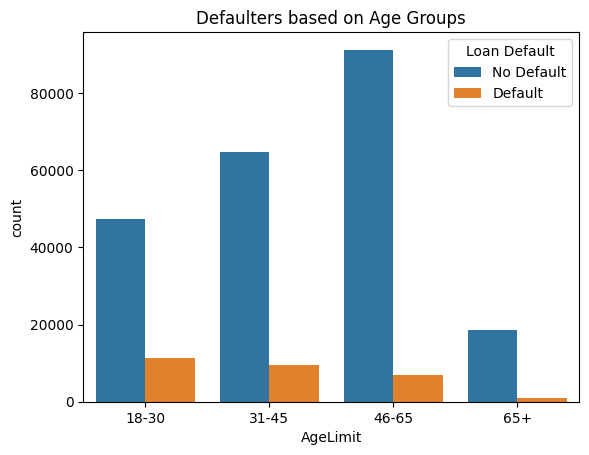

In [8]:
sns.countplot(x = "AgeLimit", hue = "Default", data = data )
plt.title("Defaulters based on Age Groups")
plt.legend(title='Loan Default', labels=['No Default', 'Default'])

### Income Vs Defaulters

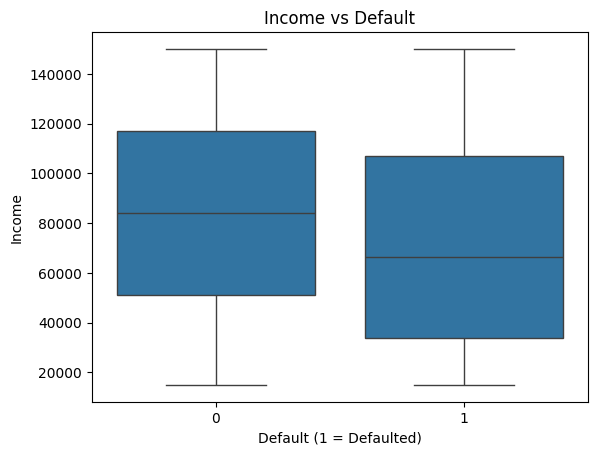

In [22]:
sns.boxplot(x='Default', y='Income', data=data)
plt.title("Income vs Default")
plt.xlabel("Default (1 = Defaulted)")
plt.ylabel("Income")
plt.show()

### Defaulters Based On Education Level

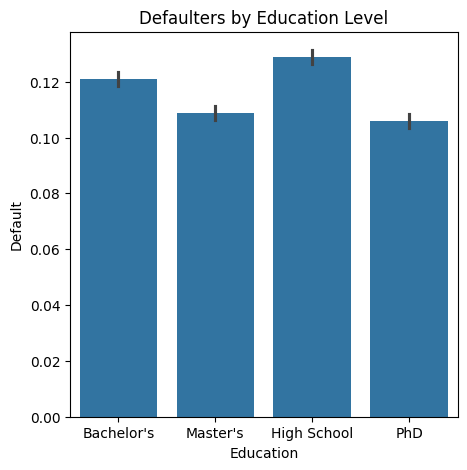

In [10]:
plt.figure(figsize = (5,5))
sns.barplot(x='Education', y='Default', data=data, estimator='mean')
plt.title("Defaulters by Education Level")
plt.show()

### Defaulters Based on their Marital Status

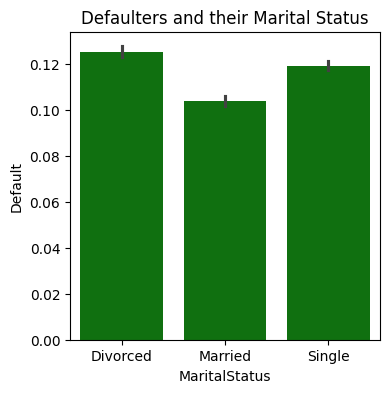

In [27]:
plt.figure(figsize = (4,4))
sns.barplot(x='MaritalStatus', y='Default', data=data, estimator='mean', color = "green")
plt.title("Defaulters and their Marital Status")
plt.show()

### Creating Count Plots with respect to Other columns

In [18]:
def plot_default_counts(col):
    plt.figure(figsize=(10,6))
    data.groupby([col, "Default"]).size().unstack().plot(
        kind="bar",
        figsize=(12,6)
    )
    plt.title(f"Counts of Default by {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.legend(title="Default")
    plt.show()

<Figure size 1000x600 with 0 Axes>

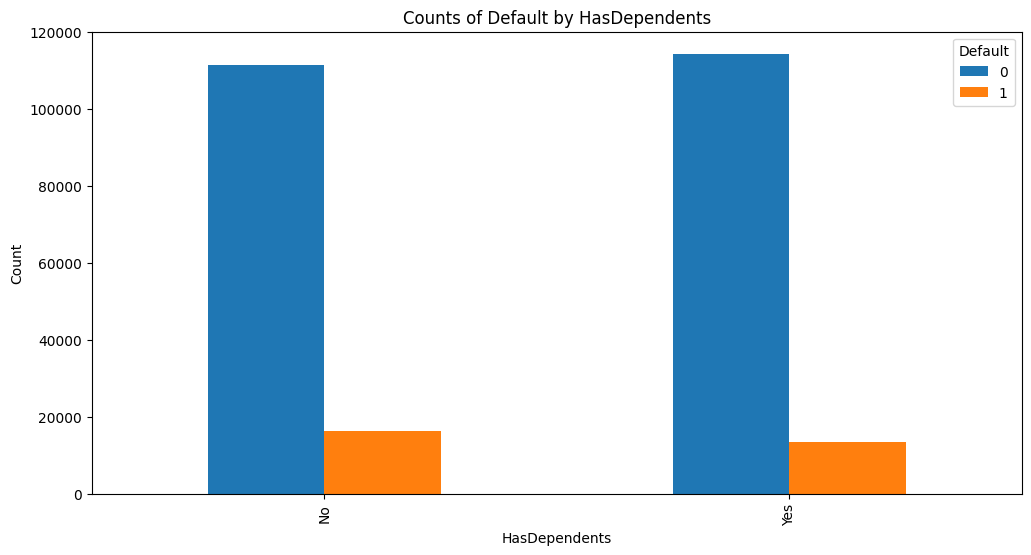

<Figure size 1000x600 with 0 Axes>

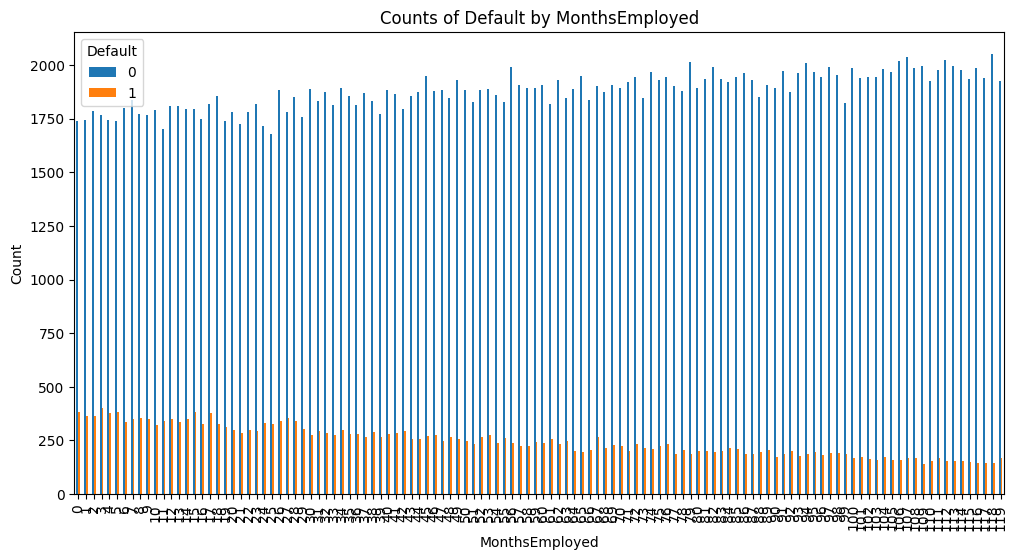

In [21]:
# We can generate count plots changing the name of column here 
plot_default_counts("HasDependents") 
plot_default_counts("MonthsEmployed")

## CREATING CLASSIFICATION MODEL, LOGISTIC REGRESSION:

**Creating Training Dataset**

In [20]:
# Created x and y variables:

y = data["Default"]
x = data.drop(columns = ["LoanID", "Default", "AgeLimit"])

**Turning Categorical columns to numeric:**

In [ ]:
# Using Label Encoding

le = LabelEncoder()

categorical_cols = x.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])  # Now all columns are numerical
x.dtypes  # Final check that none of the column is categorical or object

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int64
EmploymentType      int64
MaritalStatus       int64
HasMortgage         int64
HasDependents       int64
LoanPurpose         int64
HasCoSigner         int64
dtype: object

**Scaling Numeric Data with StandardScaler**

In [22]:
# Scaling the numerica data:

ss = StandardScaler()

In [15]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,AgeLimit
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,46-65
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,65+
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,46-65
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,31-45
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,46-65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,0,18-30
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,1,31-45
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,1,2,1,1,1,0,1,0,46-65
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,1,1,2,1,1,4,0,0,31-45


In [23]:
numeric_cols = x.select_dtypes(include=['int64','float64']).columns  # To select only numeric columns for scaling 
x[numeric_cols] = ss.fit_transform(x[numeric_cols]) 

**Splitting Data into Training and Testing Sets:**

In [24]:
# Splitting the data into training and testing sets:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

**Creating Model:**

In [25]:
Model = LogisticRegression()

In [ ]:
Model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_pred = Model.predict(x_test)

**Checking Accuracy Score**

In [28]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8858625416095555


**Confusion Matrix:**

In [29]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[45053   117]
 [ 5712   188]]


In [30]:
print(classification_report(y, Model.predict(x)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    225694
           1       0.61      0.03      0.06     29653

    accuracy                           0.89    255347
   macro avg       0.75      0.51      0.50    255347
weighted avg       0.85      0.89      0.84    255347



In [35]:
from joblib import dump, load

# Save the model
dump(Model, "loan_model.joblib")

# Load the model later
loaded_model = load("loan_model.joblib")

# Use it
y_pred = loaded_model.predict(x_test)
print("Logistic Model Saved Successfully!") 
print(y_pred)

Logistic Model Saved Successfully!
[0 0 0 ... 0 0 0]
